In [1]:
%env THEANO_FLAGS=device=gpu0,lib.cnmem=0.9,floatX=float32
%env USER_EMB_SIZE=256
import sys
sys.path.insert(0, '../')

from __future__ import unicode_literals

from mymodule.neural.discriminator import DssmModel
from mymodule.base_stuff import Vocab
from agentnet.utils.persistence import load, save
from mymodule.twitter_stuff import iterate_minibatches_twitter_dssm

env: THEANO_FLAGS=device=gpu0,lib.cnmem=0.9,floatX=float32
env: USER_EMB_SIZE=256


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 5110)


In [2]:
vocab_path = '../twitter_data/tokens.txt'
dssm_data_train = '../twitter_data/dssm_data_train'
dssm_data_val = '../twitter_data/dssm_data_val'
pretrained_encoder_path = '../weights/test_twitter_encoder.pkl'
num_users = 1000

In [3]:
vocab = Vocab.read_from_file(vocab_path)

In [4]:
dssm_model = DssmModel(vocab, num_users)
load(dssm_model.l_utt_enc.output, pretrained_encoder_path)

In [5]:
loss_history = []
val_score_history = []

mean loss =  0.221268
mean val loss =  0.225298


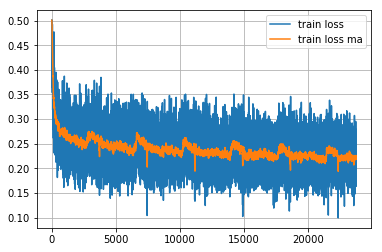

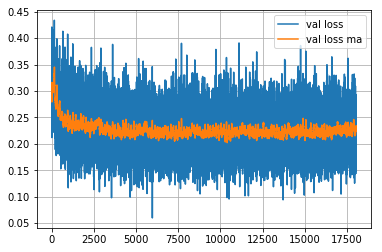

Saving model...


7546it [15:06,  9.03it/s]

KeyboardInterrupt: 

In [6]:
N_EPOCHS = 1000
BATCH_SIZE = 64
EVAL_EVERY = 1000

import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from IPython.display import clear_output
from pandas import ewma
import numpy as np

for ne in xrange(N_EPOCHS):
    for i,(buid,bgood,bbad) in tqdm(enumerate(iterate_minibatches_twitter_dssm(dssm_data_train, vocab, BATCH_SIZE))):

        loss = dssm_model.train_op(buid,bgood,bbad)
        if i%5==0:
            loss_history.append(loss)
        
        if (i+1)%EVAL_EVERY == 0:
            for n_batches,(buid,bgood,bbad) in enumerate(iterate_minibatches_twitter_dssm(dssm_data_val, vocab, BATCH_SIZE)):
                val_score_history.append(dssm_model.val_op(buid,bgood,bbad))


            clear_output(True)
            print "mean loss = ",np.mean(loss_history[-n_batches:])
            print "mean val loss = ",np.mean(val_score_history[-n_batches:])

            plt.plot(loss_history,label='train loss')
            plt.plot(ewma(np.array(loss_history),span=50),label='train loss ma')
            plt.grid()
            plt.legend()
            plt.show()

            plt.plot(val_score_history,label='val loss')
            plt.plot(ewma(np.array(val_score_history),span=50),label='val loss ma')
            plt.grid()
            plt.legend()
            plt.show()
            
            print "Saving model..."
            save(dssm_model.l_utt_semantic, '../weights/dssm_model_l_utt_semantic.pkl')
            save(dssm_model.l_user_semantic, '../weights/dssm_model_l_user_semantic.pkl')
    


In [7]:
from mymodule.base_stuff import phrase2matrix

In [8]:
from __future__ import unicode_literals

In [9]:
dssm_model.predict_d_op(np.array([727]), phrase2matrix(['Это все-таки наверное не мозги а что то другое'], vocab, normalize=True))

array([ 0.6768766], dtype=float32)

In [21]:
dssm_model.predict_d_op(np.array([727]), phrase2matrix(['ок'], vocab, normalize=True))

array([ 0.04051379], dtype=float32)

In [43]:
save(enc.output, '../weights/test_twitter_encoder.pkl')

In [22]:
for _ in xrange(10):
    print gentest.reply(['меня зовут дима', 'дима ты фашист!'])

юля даша родила а тебя как
отлично , а у тебя как ?
хахах да ну ее _UNK_
когда твое имя нашёл ?
я рада что это круто
да зачем ты мне звонишь то ?
че ну правда _UNK_
я нормальная , а мило
такая же реакция , ахах
я такая _UNK_


In [6]:
it = iterate_minibatches_twitter_dssm('../twitter_data/dssm_data_selected_users', vocab, 5)

In [7]:
buid, bgood, bbad = next(it)

In [8]:
buid

array([891, 728, 619, 825, 503])

In [16]:
for tok in [vocab.tokens[i] for i in bbad[1]]:
    print tok, 

фотошоп 2 . 01 первая _UNK_ , 2 . 02 _UNK_ вторая ( расстояние 3 . . . _UNK_ ) , 2 . 08 начало взрыва на краю _UNK_ ( это влево ещё метров 20 . . . 30 ) _EOS_


In [9]:
bgood

array([[   19,   479,     0, 50002, 50002,    13, 50002,    22,   192,
        50004, 50001, 50001, 50001],
       [   23, 23474,    59,    44,     2,     2,     2,     2,     2,
        50004, 50001, 50001, 50001],
       [50002, 50004, 50001, 50001, 50001, 50001, 50001, 50001, 50001,
        50001, 50001, 50001, 50001],
       [   34,   285, 21786,     0,   418,  4574,     0,  2939,    16,
        50002, 50002, 40323, 50004],
       [ 6797, 34652,  1079, 50004, 50001, 50001, 50001, 50001, 50001,
        50001, 50001, 50001, 50001]], dtype=int32)

In [10]:
bbad

array([[50002,     0,    36,   227, 50002,  5619,     0,   555, 13663,
         5598,     0,  3214,     0,    10, 50002,  8195, 50002,  2181,
        50004, 50001, 50001, 50001, 50001, 50001, 50001, 50001, 50001,
        50001, 50001, 50001, 50001, 50001, 50001, 50001, 50001, 50001,
        50001, 50001, 50001, 50001, 50001],
       [ 7156,   129,     1,  7222,   988, 50002,     0,   129,     1,
        10222, 50002,  1726,    17,  8980,   176,     1,     1,     1,
        50002,     2,     0,   129,     1, 19453,  1178,  8633,    11,
        12162, 50002,    17,    13, 27873,   110,  5416,   505,     1,
            1,     1,   647,     2, 50004],
       [ 6461,     0,     8,   244,    52,  6452,     0,    52, 24343,
        24827,     0,     9,  3697,     0,     8,   244,     4,  6452,
            0,   400, 50002, 50004, 50001, 50001, 50001, 50001, 50001,
        50001, 50001, 50001, 50001, 50001, 50001, 50001, 50001, 50001,
        50001, 50001, 50001, 50001, 50001],
       [  316,  

In [7]:
with codecs.open('../twitter_data/selected_uids.txt', 'w', encoding='utf8') as fout:
    for uid in selected_uids:
        fout.write(str(uid)+'\n')

In [25]:
with codecs.open('../twitter_data/yt_twitter_chains_3', encoding='utf8') as fin, codecs.open('../twitter_data/dssm_data_selected_users', 'w', encoding='utf8') as fout:
    fin.readline() # read "value" line
    for line in tqdm(fin):
        msgs = line.strip().split('\\t')
        last_msg = msgs[-1]
        uid = last_msg.split()[0]
        msg = ' '.join(last_msg.split()[1:])
        if uid in selected_uids:
            fout.write("{}\t{}\n".format(selected_uids[uid], msg))

10329968it [02:46, 62117.55it/s]


In [42]:
counter.most_common(1)

[(u'242397689', 5492)]

In [41]:
len(selected_chains)

788178